In [1]:
import numpy as np # for algebra
import pandas as pd # for DataFrames and Series processing
import pandas

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes = True)

### Loading iris dataset

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

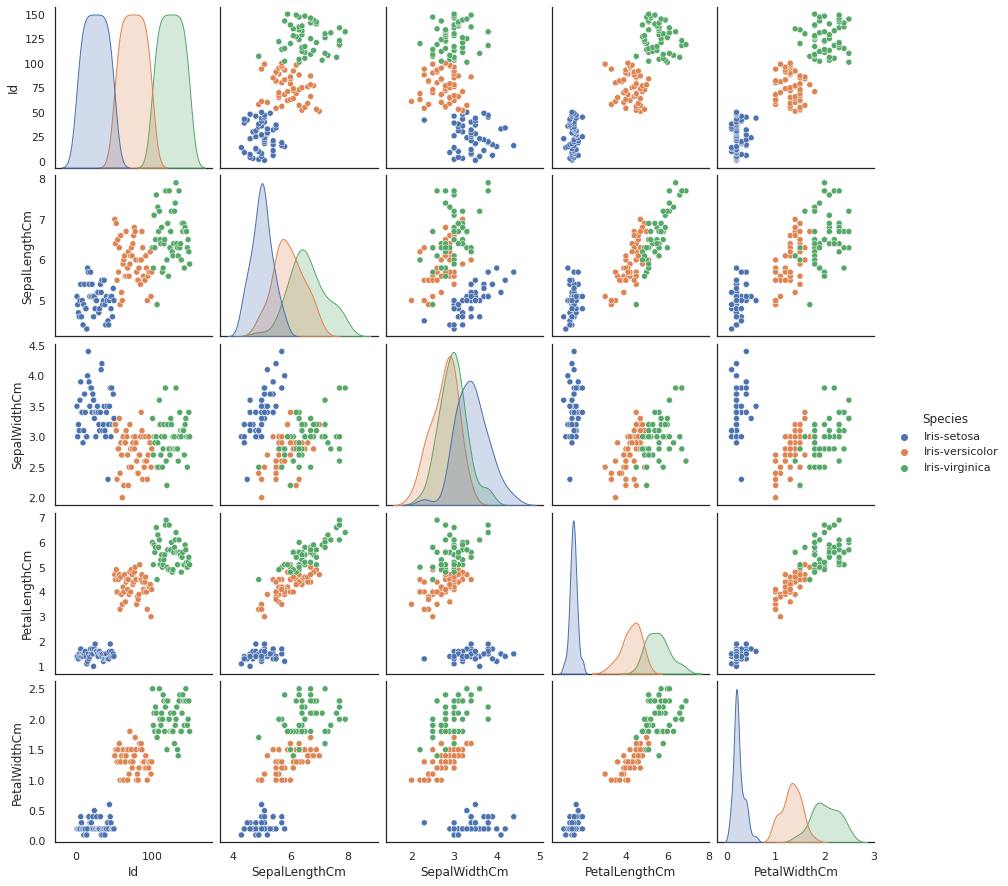

In [4]:
 sns.pairplot(data=iris, hue= 'Species')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


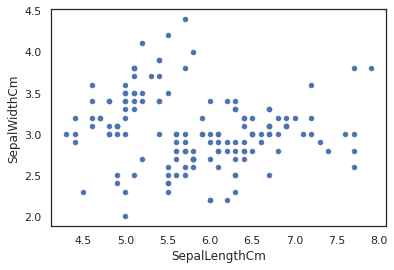

In [5]:
iris.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')# Make scatter plot of two first features

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


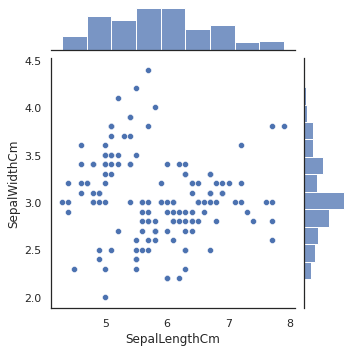

In [6]:
sns. jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,size=5)

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Seaborn Facet grids

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


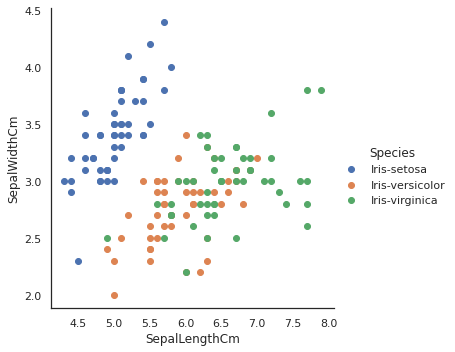

In [9]:
sns.FacetGrid(iris,hue='Species',size=5).map(plt.scatter, 'SepalLengthCm','SepalWidthCm').add_legend()

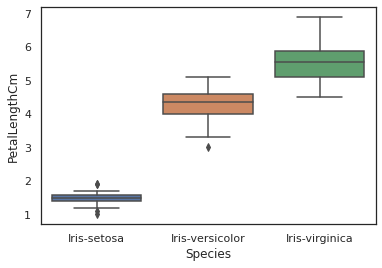

In [10]:
#Boxplots
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)

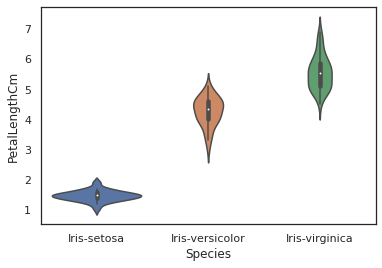

In [11]:
# Violion charts
# Denser regions are with more probes
sns.violinplot(x='Species',y='PetalLengthCm',data=iris,size=6)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


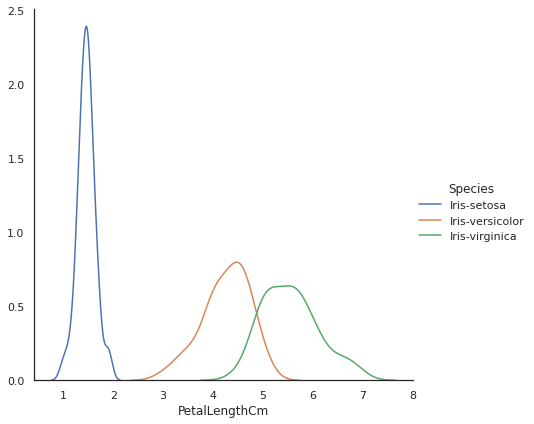

In [12]:
# Gaussian matrix plot
sns.FacetGrid(iris,hue='Species',size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

In [13]:
# We can easly see that Iris Setosa can be easly classified with Petal data. Iris versicolor and virginica need more preprocessing

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


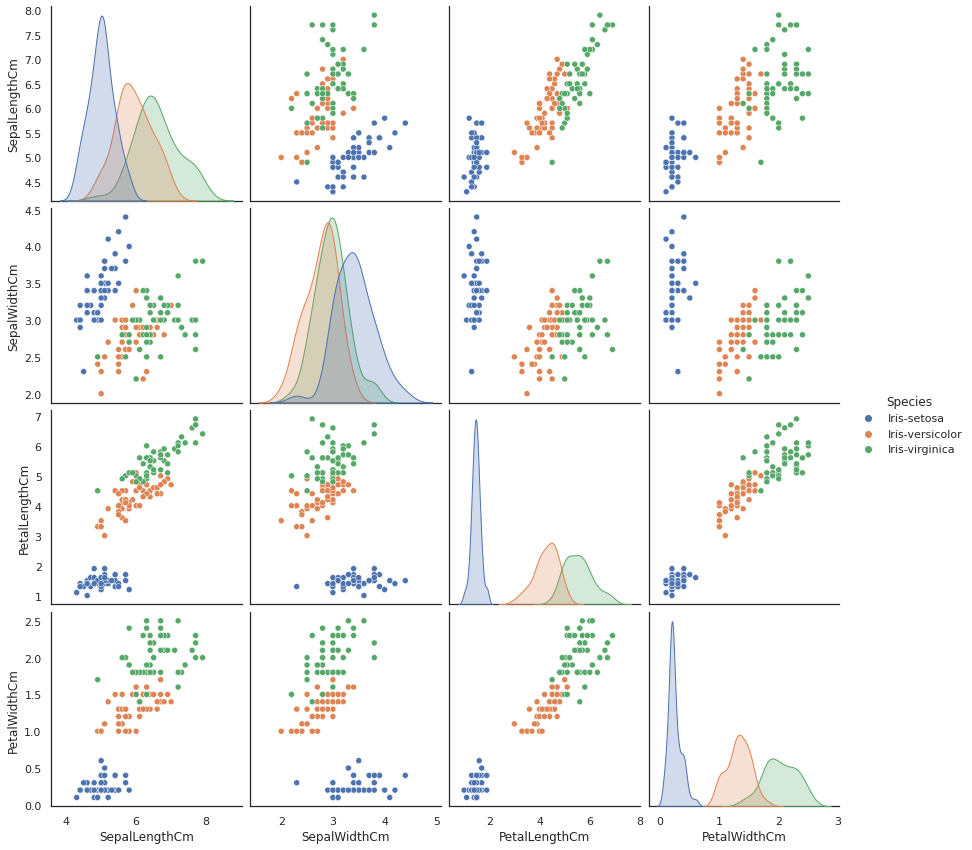

In [14]:
sns.pairplot(iris.drop('Id', axis=1), hue='Species', size=3)

Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features

From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

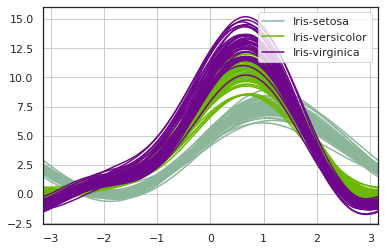

In [15]:
#Andrews curves - that function involve using attributes of samples as coefficients for Fourier series
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id",axis=1),'Species')

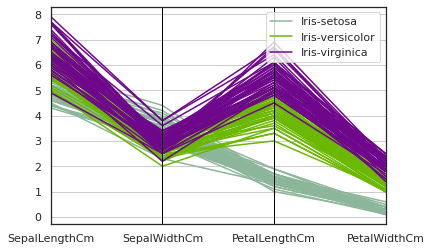

In [16]:
#Using pararell coordinates
# Parallel coordinates plots ease feature on separate column and then draw the lines
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

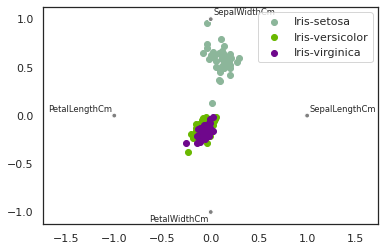

In [17]:
#Multivariate Radviz visualization technique
#It shows on 2D plane what features has biggest correlation factor
from pandas.plotting import radviz
radviz(iris.drop("Id",axis=1),'Species')

### Machine Learning Part

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris.drop("Id",axis=1,inplace=True)

### Histogram data

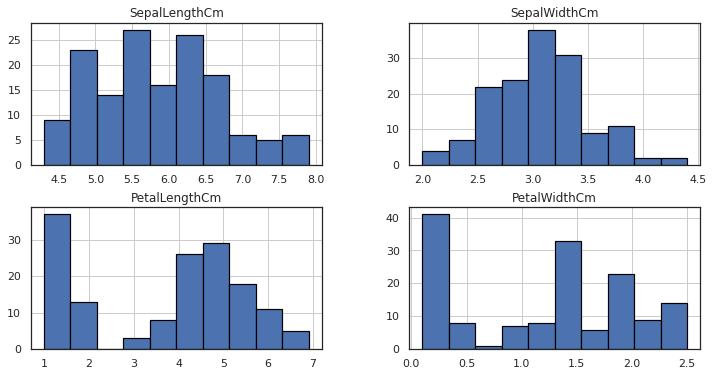

In [21]:
iris.hist(edgecolor='black', linewidth = 1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### This is a classification problem. So we will be using classification algos to solve this problem

### Importing all necessary algorythms of classification

In [47]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Algo
from sklearn.model_selection import train_test_split, cross_val_score # For splitting train and test data
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # Support Vector Machine
from sklearn import metrics # for checking model accuracy
from sklearn.tree import DecisionTreeClassifier # Tree methods

In [23]:
iris.shape

(150, 5)

In [24]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


We see that Sepals width and length are not correlated at all. Petal width and length are higly correlated, also Sepals with petals are correlated

### Splitting dataset into Test Set and Train Set

In [28]:
train, test = train_test_split(iris,test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [31]:
train_X = train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
train_y = train.Species

test_X = train[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
test_y = train.Species

In [32]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
92,5.8,2.6,4.0,1.2
139,6.9,3.1,5.4,2.1
25,5.0,3.0,1.6,0.2
27,5.2,3.5,1.5,0.2
135,7.7,3.0,6.1,2.3


In [33]:
train_y.head()

92     Iris-versicolor
139     Iris-virginica
25         Iris-setosa
27         Iris-setosa
135     Iris-virginica
Name: Species, dtype: object

### Support Vector Machine SVM

In [34]:
model = svm.SVC()

model.fit(train_X,train_y) # Training an algorythm

prediction = model.predict(test_X) # Predicting an outcome
print("The accuracy of the SVM is : ", metrics.accuracy_score(prediction,test_y)) # Checking accuracy


The accuracy of the SVM is :  0.9809523809523809


## Logistic Regression

In [46]:
model = LogisticRegression(max_iter=25)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9714285714285714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Decision Tree

In [49]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))
val = cross_val_score(model, train_X,train_y,cv=3)
print(val)

The accuracy of Decision Tree is:  1.0
[0.97142857 0.94285714 0.88571429]


# K- Nearest Neighbours

In [44]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9619047619047619


### Now time to split data of Petals and Sepals

In [50]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

## For Iris Petal

In [51]:
train_p,test_p = train_test_split(petal,test_size = 0.3, random_state=0)
train_x_p = train_p[['PetalLengthCm','PetalWidthCm']]
train_y_p = train_p.Species

test_x_p = test_p[['PetalLengthCm','PetalWidthCm']]
test_y_p = test_p.Species

# For Iris Sepal

In [53]:
train_s,test_s = train_test_split(sepal,test_size = 0.3, random_state=0)
train_x_s = train_s[['SepalLengthCm','SepalWidthCm']]
train_y_s = train_s.Species

test_x_s = test_s[['SepalLengthCm','SepalWidthCm']]
test_y_s = test_s.Species

### SVM Algorythm

In [54]:
model = svm.SVC()

model.fit(train_x_p,train_y_p) # Training an algorythm

prediction = model.predict(test_x_p) # Predicting an outcome
print("The accuracy of the SVM using Petals is : ", metrics.accuracy_score(prediction,test_y_p)) # Checking accuracy



model.fit(train_x_s,train_y_s) # Training an algorythm

prediction = model.predict(test_x_s) # Predicting an outcome
print("The accuracy of the SVM using Sepals is : ", metrics.accuracy_score(prediction,test_y_s)) # Checking accuracy


The accuracy of the SVM using Petals is :  0.9777777777777777
The accuracy of the SVM using Sepals is :  0.8


# Logistic Regression

In [55]:
model = LogisticRegression()

model.fit(train_x_p,train_y_p) # Training an algorythm

prediction = model.predict(test_x_p) # Predicting an outcome
print("The accuracy of the Logistic Regression using Petals is : ", metrics.accuracy_score(prediction,test_y_p)) # Checking accuracy



model.fit(train_x_s,train_y_s) # Training an algorythm

prediction = model.predict(test_x_s) # Predicting an outcome
print("The accuracy of the Logistic Regression using Sepals is : ", metrics.accuracy_score(prediction,test_y_s)) # Checking accuracy

The accuracy of the Logistic Regression using Petals is :  0.9777777777777777
The accuracy of the Logistic Regression using Sepals is :  0.8222222222222222


# Decision Tree

In [56]:
model = DecisionTreeClassifier()

model.fit(train_x_p,train_y_p) # Training an algorythm

prediction = model.predict(test_x_p) # Predicting an outcome
print("The accuracy of the Decision Tree Classifier using Petals is : ", metrics.accuracy_score(prediction,test_y_p)) # Checking accuracy



model.fit(train_x_s,train_y_s) # Training an algorythm

prediction = model.predict(test_x_s) # Predicting an outcome
print("The accuracy of the Decision Tree Classifier using Sepals is : ", metrics.accuracy_score(prediction,test_y_s)) # Checking accuracy

The accuracy of the Decision Tree Classifier using Petals is :  0.9555555555555556
The accuracy of the Decision Tree Classifier using Sepals is :  0.6444444444444445


# K-Nearest Neighbours

In [57]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(train_x_p,train_y_p) # Training an algorythm

prediction = model.predict(test_x_p) # Predicting an outcome
print("The accuracy of the KNN using Petals is : ", metrics.accuracy_score(prediction,test_y_p)) # Checking accuracy



model.fit(train_x_s,train_y_s) # Training an algorythm

prediction = model.predict(test_x_s) # Predicting an outcome
print("The accuracy of the KNN using Sepals is : ", metrics.accuracy_score(prediction,test_y_s)) # Checking accuracy

The accuracy of the KNN using Petals is :  0.9777777777777777
The accuracy of the KNN using Sepals is :  0.7333333333333333
